<a href="https://colab.research.google.com/github/Rakesh2711/Revoultbankexam/blob/master/Revoult_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import pandas_profiling as pp
from datetime import datetime
import seaborn as sns
# from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/content'

In [0]:
os.chdir('/content/drive/My Drive/data')

In [0]:
# # Read 4 files

device = pd.read_csv('rev-devices.csv')
notification =  pd.read_csv('rev-notifications.csv')
transaction = pd.read_csv('rev-transactions.csv')
users =  pd.read_csv('rev-users.csv')

In [5]:
device.head()

,brand,user_id
0,Android,user_3257
1,Apple,user_6809
2,Android,user_9144
3,Apple,user_3636
4,Android,user_5970


In [6]:
notification.head()

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6598,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_4151,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1408,2018-12-11 02:04:46.284683
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6292,2018-12-14 17:09:58.900808


In [7]:
transaction.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_898,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1652,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_5509,2019-03-22 05:42:50.316652


In [8]:
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,0,0
1,user_1,1975,GB,London,2018-01-29 03:38:46.676876,0,STANDARD,NaN,NaN,21,0,0
2,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,STANDARD,0.0,0.0,21,0,0
3,user_3,1994,FR,Paris,2018-01-15 18:47:56.723104,0,STANDARD,1.0,0.0,0,0,0
4,user_4,1985,GB,Beckenham,2018-01-11 00:36:46.673673,0,STANDARD,NaN,NaN,2,0,0


In [9]:
transaction.isna().sum()

transaction_id                 0
transactions_type              0
transactions_currency          0
amount_usd                     0
transactions_state             0
ea_cardholderpresence    1170594
ea_merchant_mcc          1158658
ea_merchant_city         1158794
ea_merchant_country      1158979
direction                      0
user_id                        0
created_date                   0
dtype: int64

In [0]:
# Drpoing the columns which are having more than 40% of the data missing

for col in transaction.columns:
    if transaction[col].isna().sum()>(len(transaction)/100)*40:
        del transaction[col]

In [11]:
users.isna().sum()

user_id                                        0
birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     6610
attributes_notifications_marketing_email    6610
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
dtype: int64

In [12]:
# Missing value imputation for users table
users['attributes_notifications_marketing_push'].value_counts(dropna=False)/len(users)*100

1.0    62.521873
NaN    34.019557
0.0     3.458569
Name: attributes_notifications_marketing_push, dtype: float64

In [13]:
users['attributes_notifications_marketing_email'].value_counts(dropna=False)/len(users)*100

1.0    59.114771
NaN    34.019557
0.0     6.865672
Name: attributes_notifications_marketing_email, dtype: float64

In [0]:
# Here I am imputing the missing data with other catagory as 2 beacause I am trating the missing 
#catagory as other catagory

users.fillna(2,inplace=True)

# Till here we have imputed all the missing values 

In [0]:
notification['created_date']=notification['created_date'].astype('datetime64[ns]')

In [0]:
transaction['created_date'] = transaction['created_date'].astype('datetime64[ns]')

In [0]:
transaction['t_month'] = transaction['created_date'].dt.month

transaction['t_year'] = transaction['created_date'].dt.year

transaction['t_day'] = transaction['created_date'].dt.day

transaction['t_week'] = transaction['created_date'].dt.week

In [18]:
transaction.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,created_date,t_month,t_year,t_day,t_week
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,2018-04-03 03:34:21.784487,4,2018,3,14
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,2019-03-19 06:15:59.537032,3,2019,19,12
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,2019-03-18 18:53:41.323032,3,2019,18,12
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,2019-03-22 14:20:01.513032,3,2019,22,12
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_5509,2019-03-22 05:42:50.316652,3,2019,22,12


In [0]:
del transaction['created_date']

In [0]:
notification['n_month'] = notification['created_date'].dt.month

notification['n_year'] = notification['created_date'].dt.year

notification['n_day'] = notification['created_date'].dt.day

notification['n_week'] = notification['created_date'].dt.week

del notification['created_date']

In [21]:
notification.head()

,reason,channel,status,user_id,n_month,n_year,n_day,n_week
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,12,2018,2,48
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6598,12,2018,1,48
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_4151,12,2018,4,49
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1408,12,2018,11,50
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6292,12,2018,14,50


In [0]:
users['created_date']=users['created_date'].astype('datetime64[ns]')

In [0]:
users['u_month'] = users['created_date'].dt.month

users['u_year'] = users['created_date'].dt.year

users['u_day'] = users['created_date'].dt.day

users['u_week'] = users['created_date'].dt.week

del users['created_date']

## Data PrePeration

In [24]:
list(zip([users.shape,transaction.shape,notification.shape,device.shape]))

[((19430, 15),), ((2740075, 11),), ((121813, 8),), ((19430, 2),)]

In [25]:
transaction.head(3)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,t_week
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,14
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,12
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,12


In [26]:
users.head(3)

,user_id,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,u_month,u_year,u_day,u_week
0,user_0,1989,PL,Gdansk,1,STANDARD,1.0,1.0,3,0,0,1,2018,13,2
1,user_1,1975,GB,London,0,STANDARD,2.0,2.0,21,0,0,1,2018,29,5
2,user_2,1987,PL,Poznań,0,STANDARD,0.0,0.0,21,0,0,1,2018,18,3


In [27]:
pp.ProfileReport(users)

Number of variables,15
Number of observations,19430
Total Missing (%),0.0%
Total size in memory,2.2 MiB
Average record size in memory,120.0 B
Numeric,5
Categorical,3
Boolean,2
Date,0
Text (Unique),1
Rejected,4


In [0]:
# attributes_notifications_marketing_email is highly correlated with attributes_notifications_marketing_push(ρ = 0.93666)
# num_contacts is highly Skewed
# num_referrals has constant value 0 
# num_successful_referrals has constant value 0 
# u_week is highly correlated with u_month (ρ = 0.98337) 
# I will drop num_referrals,num_successful_referrals,u_week from our dataset

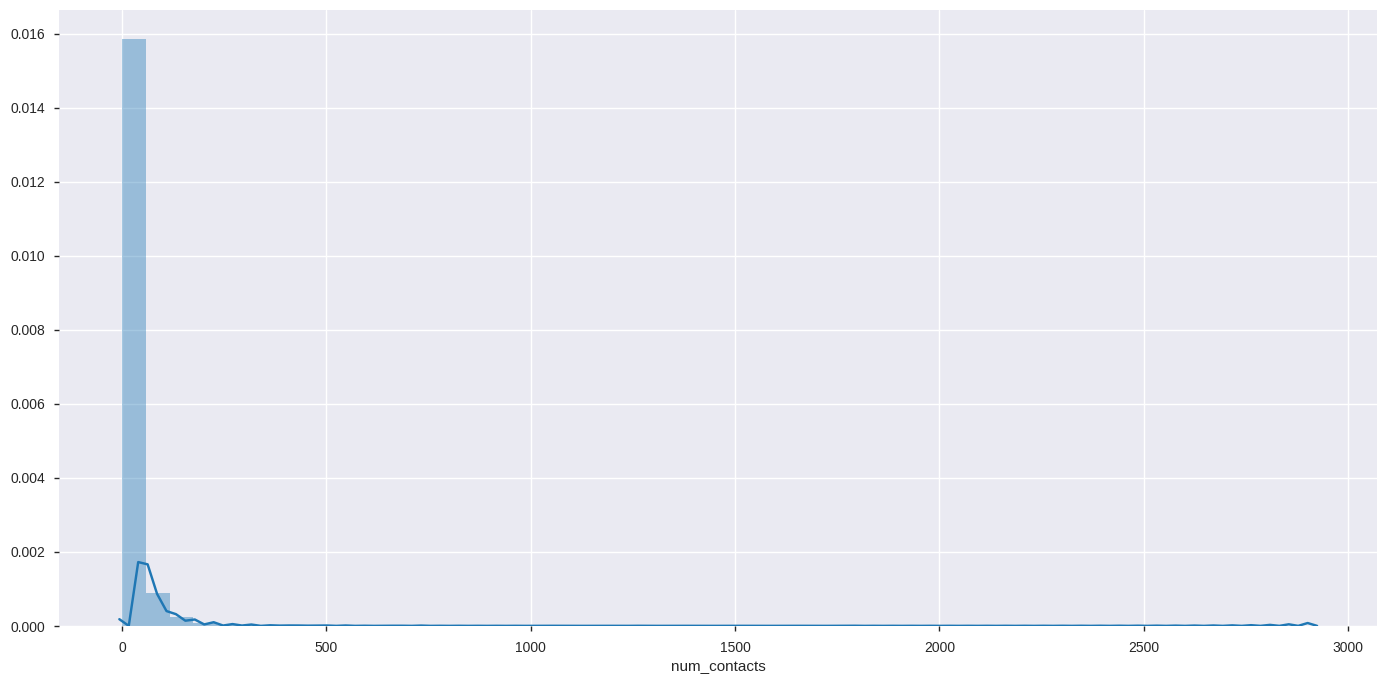

In [29]:
plt.rcParams['figure.figsize'] = 17,8
sns.distplot(users['num_contacts'])
plt.show()

In [30]:
users['num_referrals'].value_counts()

0    19430
Name: num_referrals, dtype: int64

In [31]:
users['num_successful_referrals'].value_counts()

0    19430
Name: num_successful_referrals, dtype: int64

In [0]:
users.drop(['num_referrals','num_successful_referrals','u_week'],axis=1,inplace=True)

In [33]:
users.head()

,user_id,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day
0,user_0,1989,PL,Gdansk,1,STANDARD,1.0,1.0,3,1,2018,13
1,user_1,1975,GB,London,0,STANDARD,2.0,2.0,21,1,2018,29
2,user_2,1987,PL,Poznań,0,STANDARD,0.0,0.0,21,1,2018,18
3,user_3,1994,FR,Paris,0,STANDARD,1.0,0.0,0,1,2018,15
4,user_4,1985,GB,Beckenham,0,STANDARD,2.0,2.0,2,1,2018,11


In [34]:
device.head()

,brand,user_id
0,Android,user_3257
1,Apple,user_6809
2,Android,user_9144
3,Apple,user_3636
4,Android,user_5970


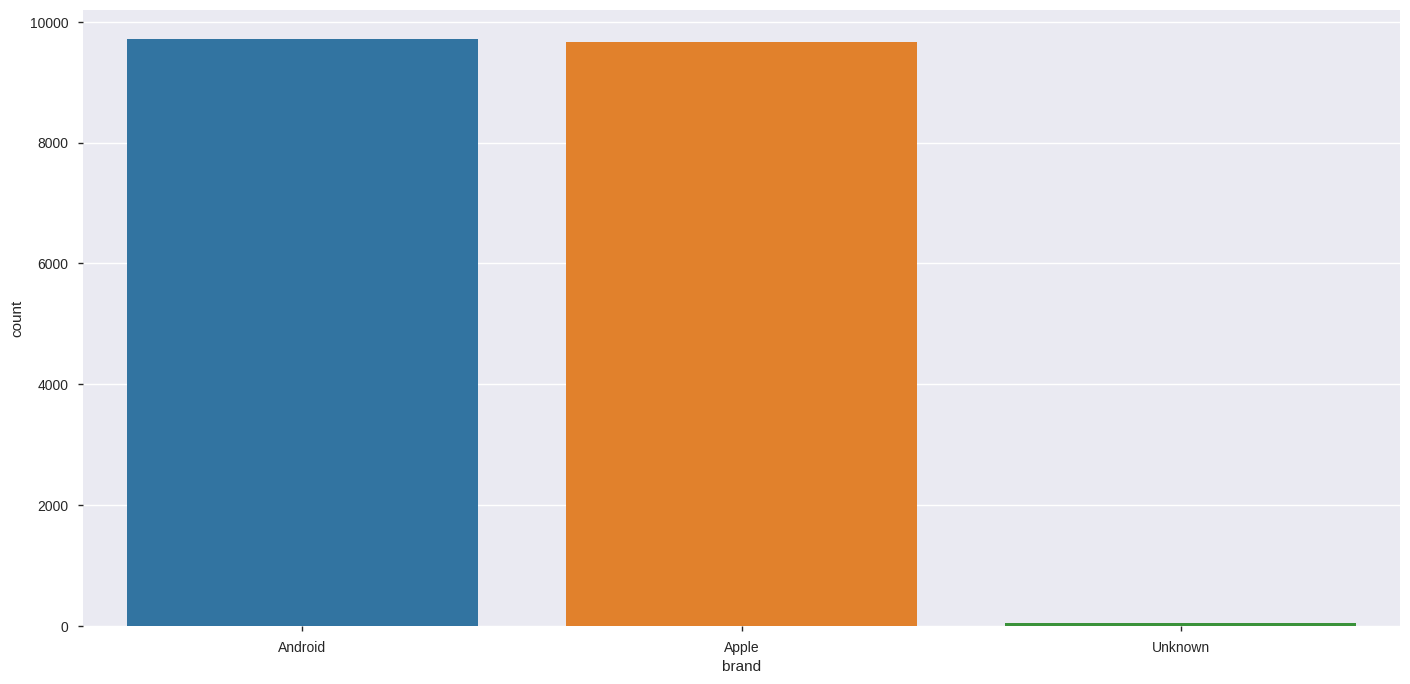

In [35]:
sns.countplot(device['brand'])

In [36]:
notification.head()

,reason,channel,status,user_id,n_month,n_year,n_day,n_week
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,12,2018,2,48
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6598,12,2018,1,48
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_4151,12,2018,4,49
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1408,12,2018,11,50
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6292,12,2018,14,50


In [37]:
pp.ProfileReport(notification)

Number of variables,8
Number of observations,121813
Total Missing (%),0.0%
Total size in memory,7.4 MiB
Average record size in memory,64.0 B
Numeric,2
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [0]:
# user_id has a high cardinality: 18953 distinct values Warning
# n_week is highly correlated with n_month (ρ = 0.98474) Rejected
# Dataset has 2466 duplicate rows Warning

In [0]:
notification.drop('n_week',axis = 1,inplace = True)

In [40]:
# Before dropping the duplicate rows
notification.shape

(121813, 7)

In [0]:
notification.drop_duplicates(inplace=True)

In [42]:
# After dropping the duplicate rows
notification.shape

(119347, 7)

In [43]:
pp.ProfileReport(transaction)

Number of variables,11
Number of observations,2740075
Total Missing (%),0.0%
Total size in memory,230.0 MiB
Average record size in memory,88.0 B
Numeric,3
Categorical,5
Boolean,1
Date,0
Text (Unique),1
Rejected,1


In [0]:
# amount_usd has 58604 / 2.1% zeros Zeros
# amount_usd is highly skewed (γ1 = 756.51) Skewed
# user_id has a high cardinality: 18766 distinct values Warning
# t_week is highly correlated with t_month (ρ = 0.98237) Rejected

In [0]:
transaction.drop('t_week',axis=1,inplace=True)

In [46]:
transaction['amount_usd'].min()

0.0

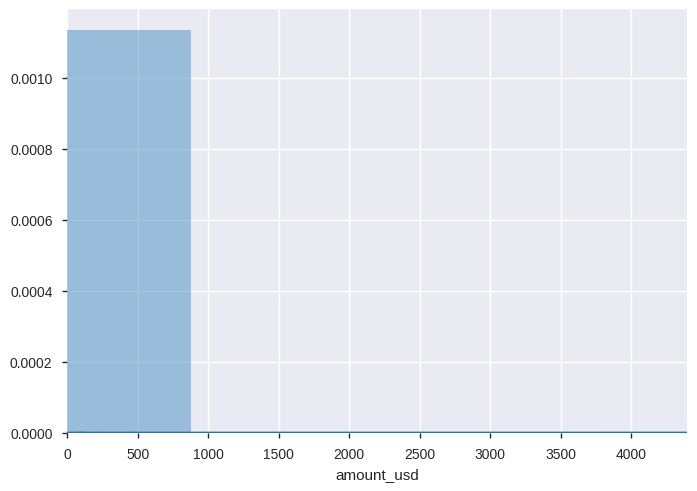

In [47]:
sns.distplot(np.cbrt(transaction['amount_usd']),bins=5)
plt.xlim(0,np.cbrt(85106453190.03))
plt.show()

 # Joining Data For Data Preperation

In [48]:
df1 = pd.merge(users,device,on=['user_id'],how='inner')

df1.head()

,user_id,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand
0,user_0,1989,PL,Gdansk,1,STANDARD,1.0,1.0,3,1,2018,13,Apple
1,user_1,1975,GB,London,0,STANDARD,2.0,2.0,21,1,2018,29,Apple
2,user_2,1987,PL,Poznań,0,STANDARD,0.0,0.0,21,1,2018,18,Android
3,user_3,1994,FR,Paris,0,STANDARD,1.0,0.0,0,1,2018,15,Apple
4,user_4,1985,GB,Beckenham,0,STANDARD,2.0,2.0,2,1,2018,11,Apple


In [49]:
df1.isna().sum()

user_id                                     0
birth_year                                  0
country                                     0
city                                        0
user_settings_crypto_unlocked               0
plan                                        0
attributes_notifications_marketing_push     0
attributes_notifications_marketing_email    0
num_contacts                                0
u_month                                     0
u_year                                      0
u_day                                       0
brand                                       0
dtype: int64

In [50]:
df2 = pd.merge(transaction,df1,on=['user_id'],how='left')

df2.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,3,2018,1,Apple
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,3,2018,1,Apple
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,3,2019,22,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,3,2018,1,Apple
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_5509,3,2019,22,1992,PL,Siedlce,0,STANDARD,1.0,1.0,0,5,2018,18,Android


In [51]:
df2.isna().sum()

transaction_id                              0
transactions_type                           0
transactions_currency                       0
amount_usd                                  0
transactions_state                          0
direction                                   0
user_id                                     0
t_month                                     0
t_year                                      0
t_day                                       0
birth_year                                  0
country                                     0
city                                        0
user_settings_crypto_unlocked               0
plan                                        0
attributes_notifications_marketing_push     0
attributes_notifications_marketing_email    0
num_contacts                                0
u_month                                     0
u_year                                      0
u_day                                       0
brand                             

In [52]:
# We can see here for one user we have lot of records for the notifications sent

notification[notification['user_id']=='user_7086']

,reason,channel,status,user_id,n_month,n_year,n_day
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,12,2018,2
3121,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,12,2018,27
7077,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,12,2018,21
18761,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,1,2019,23
20151,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,1,2019,11
21265,FIFTH_PAYMENT_PROMO,EMAIL,FAILED,user_7086,1,2019,17
28851,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,11,2018,17
33362,FIFTH_PAYMENT_PROMO,PUSH,FAILED,user_7086,1,2019,17
55479,FIFTH_PAYMENT_PROMO,PUSH,SENT,user_7086,1,2019,17
59546,FIFTH_PAYMENT_PROMO,EMAIL,SENT,user_7086,1,2019,17


In [53]:
df3 = pd.merge(df2,notification,on='user_id',how='inner')

df3.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28


In [54]:
df3.shape

(17984549, 28)

In [55]:
df3.isna().sum()

transaction_id                              0
transactions_type                           0
transactions_currency                       0
amount_usd                                  0
transactions_state                          0
direction                                   0
user_id                                     0
t_month                                     0
t_year                                      0
t_day                                       0
birth_year                                  0
country                                     0
city                                        0
user_settings_crypto_unlocked               0
plan                                        0
attributes_notifications_marketing_push     0
attributes_notifications_marketing_email    0
num_contacts                                0
u_month                                     0
u_year                                      0
u_day                                       0
brand                             

In [56]:
df3[df3['user_id']=='user_898']

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,transaction_1494052,TRANSFER,GBP,10.10,COMPLETED,INBOUND,user_898,4,2019,29,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
518,transaction_1495009,CARD_PAYMENT,GBP,3.00,COMPLETED,OUTBOUND,user_898,5,2019,1,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
519,transaction_1495009,CARD_PAYMENT,GBP,3.00,COMPLETED,OUTBOUND,user_898,5,2019,1,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
520,transaction_1534357,EXCHANGE,EUR,25.59,COMPLETED,OUTBOUND,user_898,6,2018,26,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28


In [0]:
#
df_main = df3

In [58]:
df_main.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28


In [59]:
df_main.describe()

,amount_usd,t_month,t_year,t_day,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,n_month,n_year,n_day
count,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07,1.798455e+07
mean,1.803333e+05,5.976039e+00,2.018471e+03,1.547571e+01,1.985635e+03,3.495371e-01,1.216640e+00,1.177101e+00,2.871786e+01,5.761378e+00,2.018001e+03,1.556557e+01,5.841665e+00,2.018461e+03,1.615781e+01
std,9.728314e+07,3.658456e+00,4.991442e-01,8.895053e+00,9.854630e+00,4.768238e-01,5.474480e-01,5.956569e-01,6.112604e+01,3.229601e+00,3.544632e-02,8.846522e+00,4.155020e+00,4.984896e-01,8.713968e+00
min,0.000000e+00,1.000000e+00,2.018000e+03,1.000000e+00,1.929000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,2.018000e+03,1.000000e+00
25%,2.150000e+00,3.000000e+00,2.018000e+03,8.000000e+00,1.981000e+03,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,2.018000e+03,8.000000e+00,2.000000e+00,2.018000e+03,9.000000e+00
50%,8.510000e+00,5.000000e+00,2.018000e+03,1.500000e+01,1.988000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01,6.000000e+00,2.018000e+03,1.600000e+01,4.000000e+00,2.018000e+03,1.700000e+01
75%,2.997000e+01,9.000000e+00,2.019000e+03,2.300000e+01,1.993000e+03,1.000000e+00,2.000000e+00,2.000000e+00,3.400000e+01,8.000000e+00,2.018000e+03,2.300000e+01,1.000000e+01,2.019000e+03,2.400000e+01
max,8.510645e+10,1.200000e+01,2.019000e+03,3.100000e+01,2.001000e+03,1.000000e+00,2.000000e+00,2.000000e+00,2.918000e+03,1.200000e+01,2.019000e+03,3.100000e+01,1.200000e+01,2.019000e+03,3.100000e+01


In [0]:
# Converting the columns to catagory as it was Integer but I dnt want this to be as int beacause It will not make sense.

for col in df_main.columns:
    if col.endswith('_year'):

        df_main[col] = df_main[col].astype('object')
    
    if col.endswith('month'):
        df_main[col] = df_main[col].astype('object')
        
    if col.endswith('day'):

        df_main[col] = df_main[col].astype('object')

In [0]:
# Changing the Datatypes of below variables to Integer as the responses are 0 or 1
df_main['attributes_notifications_marketing_push'] = df_main['attributes_notifications_marketing_push'].astype('int64')
df_main['attributes_notifications_marketing_email'] = df_main['attributes_notifications_marketing_email'].astype('int64')

In [62]:
df_main.dtypes

transaction_id                               object
transactions_type                            object
transactions_currency                        object
amount_usd                                  float64
transactions_state                           object
direction                                    object
user_id                                      object
t_month                                      object
t_year                                       object
t_day                                        object
birth_year                                   object
country                                      object
city                                         object
user_settings_crypto_unlocked                 int64
plan                                         object
attributes_notifications_marketing_push       int64
attributes_notifications_marketing_email      int64
num_contacts                                  int64
u_month                                      object
u_year      

# Exploratory Data Anaysis

In [63]:
df_main['user_settings_crypto_unlocked'].value_counts()

0    11698282
1     6286267
Name: user_settings_crypto_unlocked, dtype: int64

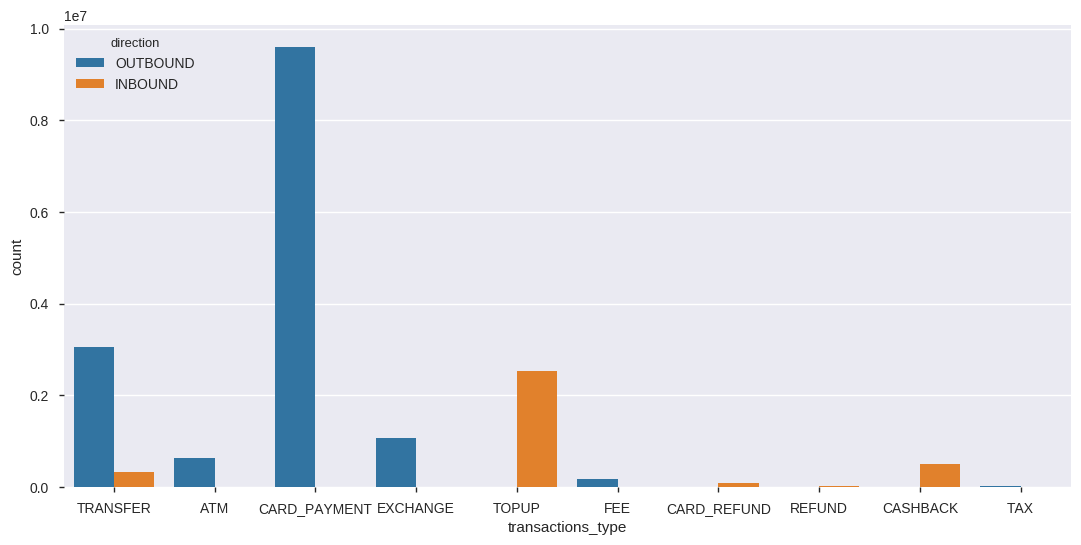

In [64]:
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(x="transactions_type", hue="direction",data=df_main)
plt.show()

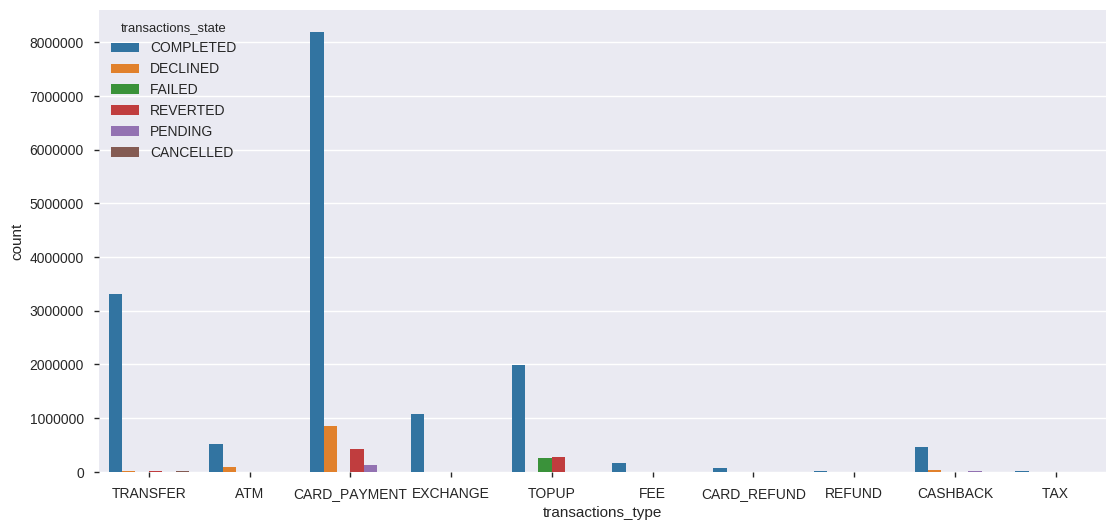

In [65]:
sns.countplot(x="transactions_type", hue="transactions_state",data=df_main)
plt.show()

In [66]:
#Year Wise how many transactions 

pd.crosstab(df_main["t_year"],df_main["transactions_type"])

transactions_type,ATM,CARD_PAYMENT,CARD_REFUND,CASHBACK,EXCHANGE,FEE,REFUND,TAX,TOPUP,TRANSFER
t_year,,,,,,,,,,
2018,371755,5167305,38622,125405,629607,119025,7527,8710,1525198,1525022
2019,254096,4436018,38546,382575,443812,50707,2896,8556,1010927,1838240


In [67]:
df_main.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28
3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24
4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28


In [0]:
# df_main.groupby('brand')['transaction_id'].count()

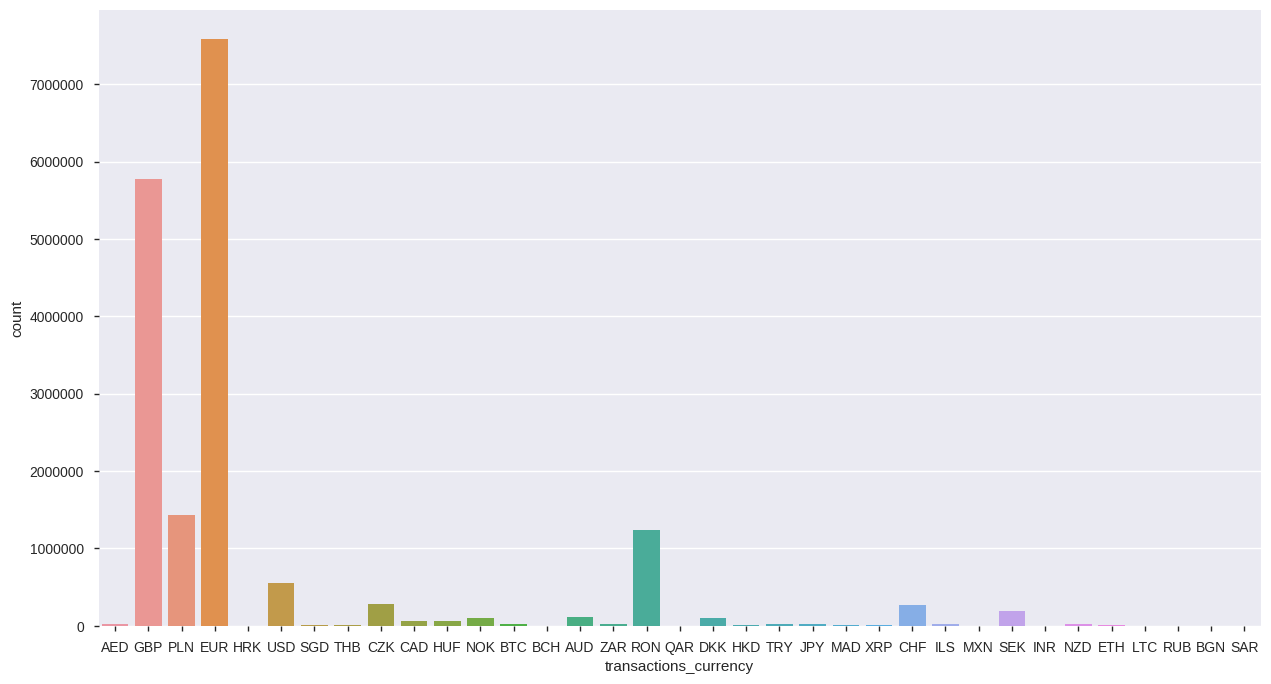

In [69]:
plt.rcParams['figure.figsize']= 15,8
sns.countplot(df_main['transactions_currency'])
plt.show()

In [70]:
who

col	 datetime	 device	 df1	 df2	 df3	 df_main	 notification	 np	 
os	 pd	 plt	 pp	 sns	 transaction	 users	 warnings	 


In [0]:
del df1,df2,df3

In [72]:
df_main.groupby('user_id')['transaction_id'].count().reset_index()

,user_id,transaction_id
0,user_0,3112
1,user_1,903
2,user_10,6318
3,user_100,532
4,user_1000,702
...,...,...
18332,user_9995,4920
18333,user_9996,1440
18334,user_9997,1079
18335,user_9998,8


In [0]:
d = df_main.groupby('user_id')['transaction_id'].count().reset_index()

d.columns = ['user_id','tran_count_each_user']

df_main = pd.merge(df_main,d,on='user_id',how='left')

df_main.head()

del d

In [74]:
df_main.shape

(17984549, 29)

In [75]:
df_main['transaction_id'].nunique()

2707436

In [76]:
pp.ProfileReport(df_main)

Number of variables,29
Number of observations,17984549
Total Missing (%),0.0%
Total size in memory,4.0 GiB
Average record size in memory,240.0 B
Numeric,11
Categorical,13
Boolean,4
Date,0
Text (Unique),0
Rejected,1


In [0]:
# attributes_notifications_marketing_email is highly correlated with attributes_notifications_marketing_push (ρ = 0.92296) Rejected
df_main.drop('attributes_notifications_marketing_push',axis=1,inplace=True)

In [78]:
df_main.head(3)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day,tran_count_each_user
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522
1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522
2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522


In [0]:
# Which month we have most of the Transactions
# Which month we have sent most of the notification

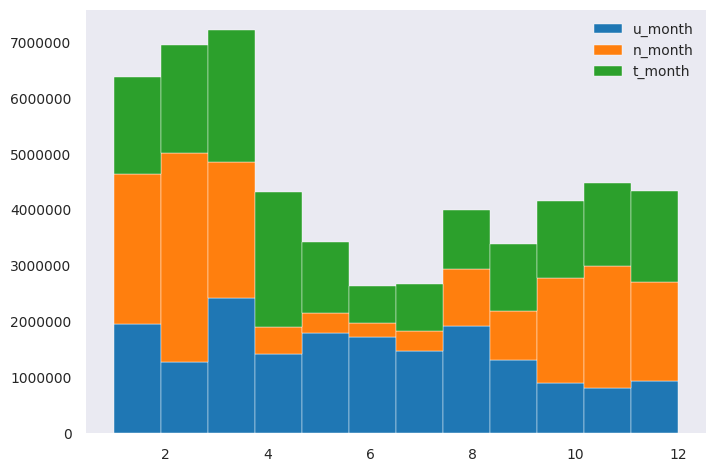

In [80]:
# Monthwise user creations,user notifications ,user transactions 
sns.set_style('dark')
mylevels = ['u_month','n_month','t_month']
plt.hist([df_main['u_month'],df_main['n_month'],df_main['t_month']],stacked=True,bins=12,rwidth=1,label=mylevels)
plt.legend()
plt.show()

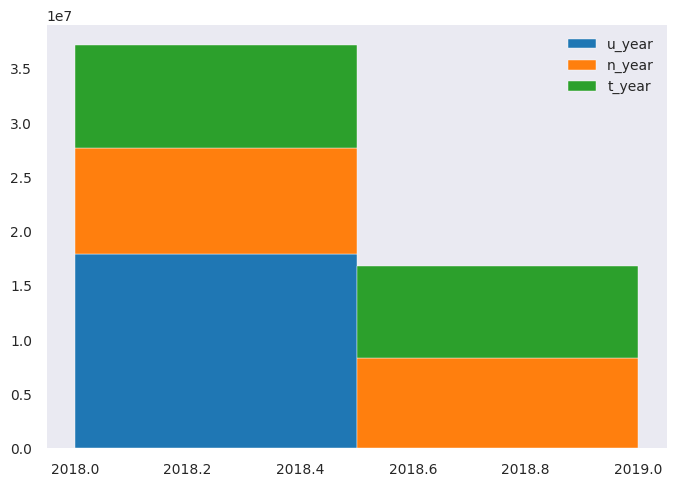

In [81]:
# Per Year user creations,user notifications ,user transactions 
sns.set_style('dark')
mylevels = ['u_year','n_year','t_year']
plt.hist([df_main['u_year'],df_main['n_year'],df_main['t_year']],stacked=True,bins=2,rwidth=1,label=mylevels)
plt.legend()
# plt.xlim('2018','2019')
plt.show()

# We can see we dnt have the data in 2019 which have users created

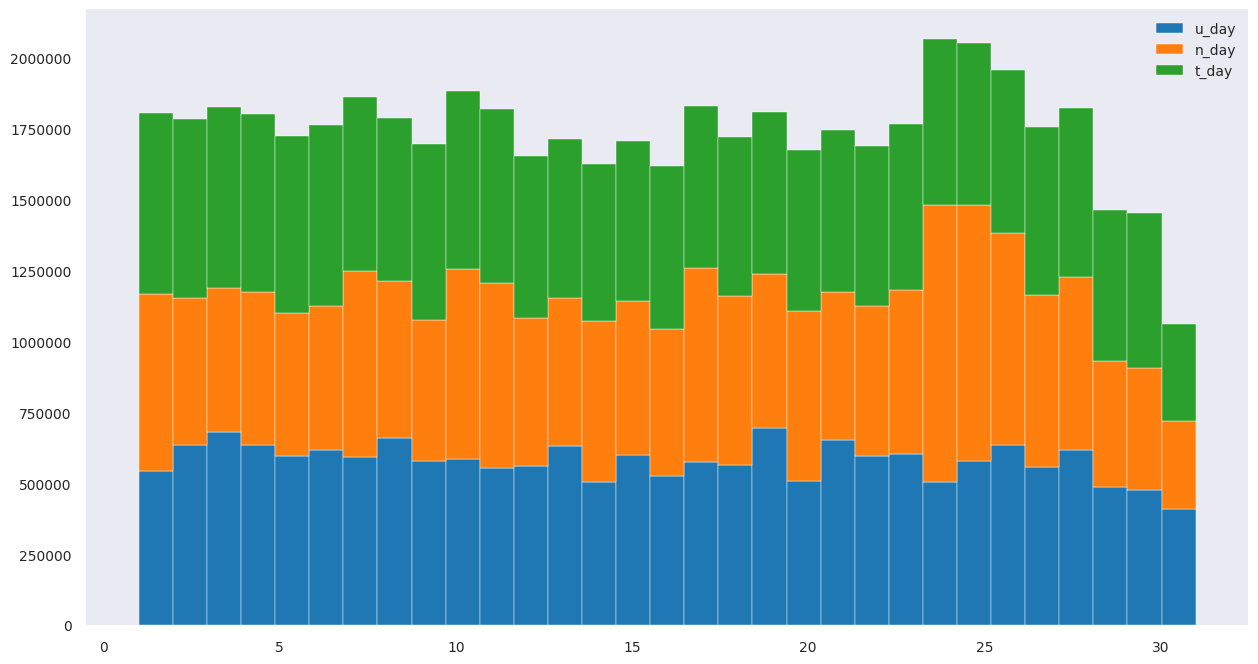

In [82]:
# Per Day user creations,user notifications ,user transactions 
plt.rcParams['figure.figsize']=15,8
sns.set_style('dark')
mylevels = ['u_day','n_day','t_day']
plt.hist([df_main['u_day'],df_main['n_day'],df_main['t_day']],stacked=True,bins=31,rwidth=1,label=mylevels)
plt.legend()
plt.show()

In [83]:
df_main.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day,tran_count_each_user
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522
1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522
2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522
3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522
4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522


In [87]:
# Transaction made by each user each month
d = df_main.groupby(['user_id','t_month','t_year'])['transaction_id'].count().reset_index()

d.head()

,user_id,t_month,t_year,transaction_id
0,user_0,1,2018,152
1,user_0,1,2019,56
2,user_0,2,2018,112
3,user_0,2,2019,168
4,user_0,3,2018,328


In [95]:
# Transaction made by each user each month
d1 = df_main.groupby(['user_id','u_year','u_month','t_year','t_month'])['transaction_id'].count().reset_index()

d1.head(20)

,user_id,u_year,u_month,t_year,t_month,transaction_id
0,user_0,2018,1,2018,1,152
1,user_0,2018,1,2018,2,112
2,user_0,2018,1,2018,3,328
3,user_0,2018,1,2018,4,96
4,user_0,2018,1,2018,5,144
5,user_0,2018,1,2018,6,224
6,user_0,2018,1,2018,7,376
7,user_0,2018,1,2018,8,168
8,user_0,2018,1,2018,9,40
9,user_0,2018,1,2018,10,216


In [97]:
d1[d1['transaction_id']<5]

,user_id,u_year,u_month,t_year,t_month,transaction_id
50,user_100,2018,1,2018,5,4
133,user_1001,2018,1,2018,6,4
240,user_10025,2018,8,2018,11,4
243,user_10025,2018,8,2019,2,4
245,user_10025,2018,8,2019,4,4
...,...,...,...,...,...,...
122521,user_9968,2018,8,2019,2,3
122652,user_9989,2018,8,2018,8,4
122730,user_9998,2018,8,2018,8,2
122731,user_9998,2018,8,2018,9,3


In [107]:
df_main['u_year'].value_counts()

2018    17961924
2019       22625
Name: u_year, dtype: int64

In [108]:
# We can see here most of the users are created in 2018 and only 22625 were created in 2019
df_main.groupby(['u_year','u_month'])['user_id'].count()

u_year  u_month
2018    1          1939590
        2          1285802
        3          2428443
        4          1418007
        5          1802333
        6          1719792
        7          1472975
        8          1922154
        9          1316676
        10          906287
        11          805208
        12          944657
2019    1            22625
Name: user_id, dtype: int64

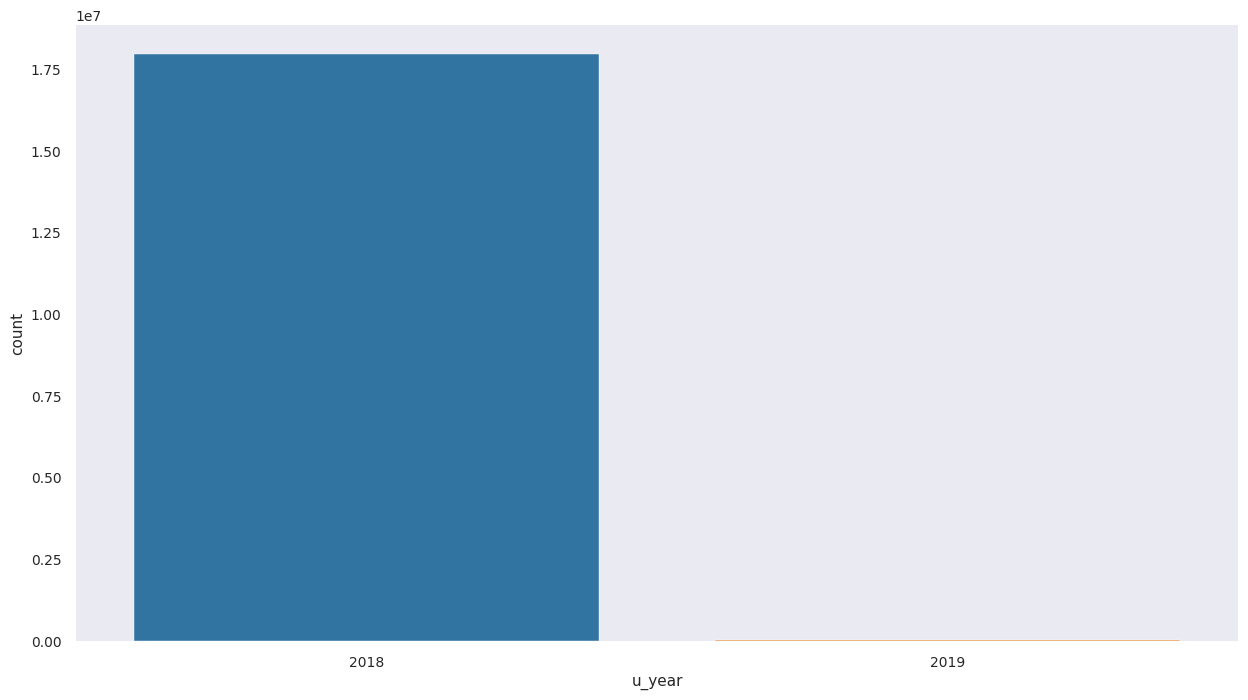

In [106]:
sns.countplot(df_main['u_year'])
plt.show()

In [111]:
d2 = df_main.groupby(['user_id','u_year','u_month','t_year','t_month'])['transaction_id'].count().reset_index()

d2.head(10)

,user_id,u_year,u_month,t_year,t_month,transaction_id
0,user_0,2018,1,2018,1,152
1,user_0,2018,1,2018,2,112
2,user_0,2018,1,2018,3,328
3,user_0,2018,1,2018,4,96
4,user_0,2018,1,2018,5,144
5,user_0,2018,1,2018,6,224
6,user_0,2018,1,2018,7,376
7,user_0,2018,1,2018,8,168
8,user_0,2018,1,2018,9,40
9,user_0,2018,1,2018,10,216


In [0]:
# Define a target metric to measure user engagement. How would you define an ​engaged vs. ​unengaged​ user?

# If user was created in 2018 and he has not done much transaction in 2018 and 2019 he will treated as unengaged user if so he is engaged user.

In [118]:
# These are the users which are identified as unengaged users as there numbers of trasactions are less  than 1 transactions per month
unengaged_users = d2[d2['transaction_id']<12]

unengaged_users.head()

,user_id,u_year,u_month,t_year,t_month,transaction_id
50,user_100,2018,1,2018,5,4
53,user_100,2018,1,2018,9,8
114,user_10007,2018,8,2019,3,9
130,user_10009,2018,8,2019,5,7
133,user_1001,2018,1,2018,6,4


In [0]:
# Now I will make my Target class as Engaged or Unengaged in terms of Zero and One where Zero represents Engaged and 1 represent unengaged

In [134]:
unengaged_users.isna().sum()

user_id           0
u_year            0
u_month           0
t_year            0
t_month           0
transaction_id    0
dtype: int64

In [142]:
unengaged_users_list = unengaged_users['user_id']
unengaged_users_list =list(set(unengaged_users_list))
unengaged_users_list

['user_14737',
 'user_18358',
 'user_1702',
 'user_1032',
 'user_11853',
 'user_3968',
 'user_4587',
 'user_1013',
 'user_6602',
 'user_1701',
 'user_16002',
 'user_18426',
 'user_266',
 'user_1765',
 'user_11464',
 'user_14317',
 'user_14424',
 'user_7157',
 'user_8412',
 'user_18276',
 'user_18968',
 'user_11088',
 'user_2111',
 'user_6197',
 'user_16117',
 'user_15727',
 'user_12501',
 'user_16662',
 'user_6328',
 'user_16340',
 'user_17683',
 'user_5662',
 'user_11016',
 'user_10038',
 'user_9156',
 'user_18256',
 'user_2985',
 'user_5226',
 'user_15671',
 'user_6775',
 'user_8505',
 'user_6956',
 'user_9071',
 'user_5957',
 'user_12763',
 'user_4136',
 'user_7674',
 'user_7656',
 'user_18420',
 'user_17347',
 'user_10474',
 'user_231',
 'user_14251',
 'user_3501',
 'user_4119',
 'user_6077',
 'user_9471',
 'user_7110',
 'user_12234',
 'user_11872',
 'user_9918',
 'user_1773',
 'user_19221',
 'user_11786',
 'user_1138',
 'user_10883',
 'user_11222',
 'user_8602',
 'user_17871',
 'u

In [144]:
len(unengaged_users_list)

9677

In [120]:
df_main.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day,tran_count_each_user
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522
1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522
2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522
3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522
4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522


In [0]:
df_main_new = df_main

In [155]:
[(count,userid) for (count,userid) in enumerate(unengaged_users_list)]

[(0, 'user_14737'),
 (1, 'user_18358'),
 (2, 'user_1702'),
 (3, 'user_1032'),
 (4, 'user_11853'),
 (5, 'user_3968'),
 (6, 'user_4587'),
 (7, 'user_1013'),
 (8, 'user_6602'),
 (9, 'user_1701'),
 (10, 'user_16002'),
 (11, 'user_18426'),
 (12, 'user_266'),
 (13, 'user_1765'),
 (14, 'user_11464'),
 (15, 'user_14317'),
 (16, 'user_14424'),
 (17, 'user_7157'),
 (18, 'user_8412'),
 (19, 'user_18276'),
 (20, 'user_18968'),
 (21, 'user_11088'),
 (22, 'user_2111'),
 (23, 'user_6197'),
 (24, 'user_16117'),
 (25, 'user_15727'),
 (26, 'user_12501'),
 (27, 'user_16662'),
 (28, 'user_6328'),
 (29, 'user_16340'),
 (30, 'user_17683'),
 (31, 'user_5662'),
 (32, 'user_11016'),
 (33, 'user_10038'),
 (34, 'user_9156'),
 (35, 'user_18256'),
 (36, 'user_2985'),
 (37, 'user_5226'),
 (38, 'user_15671'),
 (39, 'user_6775'),
 (40, 'user_8505'),
 (41, 'user_6956'),
 (42, 'user_9071'),
 (43, 'user_5957'),
 (44, 'user_12763'),
 (45, 'user_4136'),
 (46, 'user_7674'),
 (47, 'user_7656'),
 (48, 'user_18420'),
 (49, 'u

In [0]:
# [userid for userid in unengaged_users_list if userid in list(df_main_new['user_id'])]

In [176]:
# IF the user was created in 2018 and we have data till 2019 still if he has done total trnsacation less than 12 will be considered as unengaged
df_main_new[(df_main_new['tran_count_each_user']<=12) & (df_main_new['u_year']==2018)]



,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day,tran_count_each_user
411003,transaction_2283,CARD_PAYMENT,SEK,0.75,COMPLETED,OUTBOUND,user_830,3,2018,29,1981,SE,Kungälv,0,STANDARD,2,0,1,2018,23,Apple,NO_INITIAL_CARD_ORDER,EMAIL,SENT,1,2018,27,12
411004,transaction_2283,CARD_PAYMENT,SEK,0.75,COMPLETED,OUTBOUND,user_830,3,2018,29,1981,SE,Kungälv,0,STANDARD,2,0,1,2018,23,Apple,FIFTH_PAYMENT_PROMO,EMAIL,SENT,2,2019,12,12
411005,transaction_2283,CARD_PAYMENT,SEK,0.75,COMPLETED,OUTBOUND,user_830,3,2018,29,1981,SE,Kungälv,0,STANDARD,2,0,1,2018,23,Apple,FIFTH_PAYMENT_PROMO,PUSH,SENT,2,2019,12,12
411006,transaction_2283,CARD_PAYMENT,SEK,0.75,COMPLETED,OUTBOUND,user_830,3,2018,29,1981,SE,Kungälv,0,STANDARD,2,0,1,2018,23,Apple,NO_INITIAL_CARD_ORDER,EMAIL,SENT,2,2018,7,12
411007,transaction_2283,CARD_PAYMENT,SEK,0.75,COMPLETED,OUTBOUND,user_830,3,2018,29,1981,SE,Kungälv,0,STANDARD,2,0,1,2018,23,Apple,NO_INITIAL_CARD_ORDER,EMAIL,SENT,2,2018,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17984544,transaction_2722402,TOPUP,EUR,0.85,FAILED,INBOUND,user_17490,5,2019,10,1985,FR,Paris,0,STANDARD,1,0,12,2018,9,Apple,NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER,EMAIL,SENT,1,2019,1,3
17984545,transaction_2722402,TOPUP,EUR,0.85,FAILED,INBOUND,user_17490,5,2019,10,1985,FR,Paris,0,STANDARD,1,0,12,2018,9,Apple,NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER,EMAIL,SENT,1,2019,5,3
17984546,transaction_2730860,TRANSFER,EUR,12.77,COMPLETED,INBOUND,user_15011,5,2019,7,1993,IE,Killiney,0,STANDARD,1,52,10,2018,11,Apple,NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER,EMAIL,SENT,11,2018,5,3
17984547,transaction_2730860,TRANSFER,EUR,12.77,COMPLETED,INBOUND,user_15011,5,2019,7,1993,IE,Killiney,0,STANDARD,1,52,10,2018,11,Apple,NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER,EMAIL,SENT,11,2018,1,3


In [0]:
# Unengaged =1
# Engaged =0
df_main_new['engagedORUnengaed'] = np.where((df_main_new['tran_count_each_user']<=12) & (df_main_new['u_year']==2018),1 ,0)

In [179]:
df_main_new['engagedORUnengaed'].value_counts()

0    17976082
1        8467
Name: engagedORUnengaed, dtype: int64

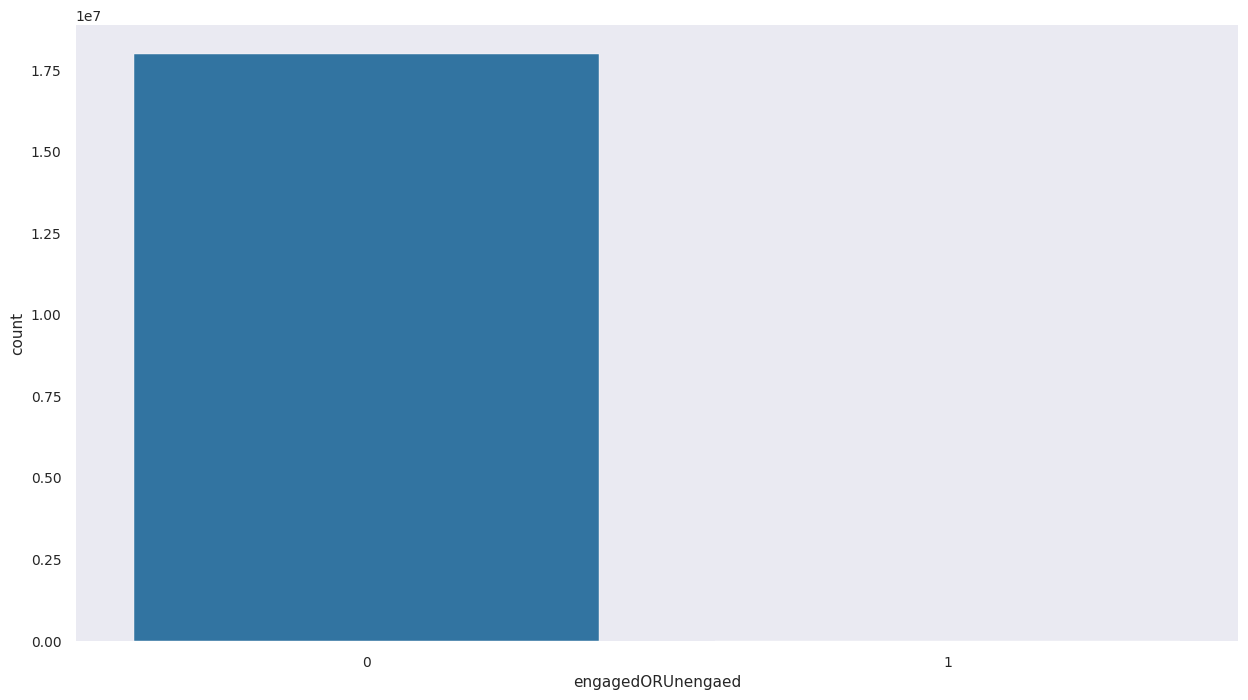

In [180]:
sns.countplot(df_main_new['engagedORUnengaed'])

In [0]:
# Our Dataset is Highly Skewed so that needs to be treated first 
# Our Data has catagorical variables that needs to be converted to numerical

In [0]:
# Creating a copy of data 
df_untouced = df_main_new

In [181]:
df_main_new.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_email,num_contacts,u_month,u_year,u_day,brand,reason,channel,status,n_month,n_year,n_day,tran_count_each_user,engagedORUnengaed
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0
1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522,0
2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0
3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522,0
4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0


In [204]:
df_main_new.dtypes

index                                                                                  int64
R_t_r_a_n_s_a_c_t_i_o_n___i_d                                                         object
R_t_r_a_n_s_a_c_t_i_o_n_s___t_y_p_e                                                   object
R_t_r_a_n_s_a_c_t_i_o_n_s___c_u_r_r_e_n_c_y                                           object
R_a_m_o_u_n_t___u_s_d                                                                float64
R_t_r_a_n_s_a_c_t_i_o_n_s___s_t_a_t_e                                                 object
R_d_i_r_e_c_t_i_o_n                                                                   object
R_u_s_e_r___i_d                                                                       object
R_t___m_o_n_t_h                                                                       object
R_t___y_e_a_r                                                                         object
R_t___d_a_y                                                           

In [202]:
df_main_new.head()

,index,R_t_r_a_n_s_a_c_t_i_o_n___i_d,R_t_r_a_n_s_a_c_t_i_o_n_s___t_y_p_e,R_t_r_a_n_s_a_c_t_i_o_n_s___c_u_r_r_e_n_c_y,R_a_m_o_u_n_t___u_s_d,R_t_r_a_n_s_a_c_t_i_o_n_s___s_t_a_t_e,R_d_i_r_e_c_t_i_o_n,R_u_s_e_r___i_d,R_t___m_o_n_t_h,R_t___y_e_a_r,R_t___d_a_y,R_b_i_r_t_h___y_e_a_r,R_c_o_u_n_t_r_y,R_c_i_t_y,R_u_s_e_r___s_e_t_t_i_n_g_s___c_r_y_p_t_o___u_n_l_o_c_k_e_d,R_p_l_a_n,R_a_t_t_r_i_b_u_t_e_s___n_o_t_i_f_i_c_a_t_i_o_n_s___m_a_r_k_e_t_i_n_g___e_m_a_i_l,R_n_u_m___c_o_n_t_a_c_t_s,R_u___m_o_n_t_h,R_u___y_e_a_r,R_u___d_a_y,R_b_r_a_n_d,R_r_e_a_s_o_n,R_c_h_a_n_n_e_l,R_s_t_a_t_u_s,R_n___m_o_n_t_h,R_n___y_e_a_r,R_n___d_a_y,R_t_r_a_n___c_o_u_n_t___e_a_c_h___u_s_e_r,R_e_n_g_a_g_e_d_O_R_U_n_e_n_g_a_e_d
0,0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0
1,1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522,0
2,2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0
3,3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522,0
4,4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0


In [205]:
c=['count','nunique']
n=['mean','max','min','sum','std']
agg_c={'transaction_id':c,'transactions_type':c,'transactions_currency':c,'transactions_state':c,'amount_usd':n,'transactions_state':c,\
       'direction':c,'t_month':c,'t_year':c,'t_day':c,
       'birth_year':c,'country':c,'city':c,'user_settings_crypto_unlocked':c,'plan':c,'attributes_notifications_marketing_email':c,\
       'num_contacts':n,
       'u_month':c,'u_year':c,'u_day':c,'brand':c,'reason':c,'channel':c,
       'status':c,'n_month':c,'n_year':c,'n_day':c ,'tran_count_each_user':n}
df_main_new=df_main_new.groupby(['user_id']).agg(agg_c)
df_main_new.head()

KeyError: ignored

In [199]:
df_main_new.columns=['R_' + '_'.join(col).strip() for col in df_main_new.columns.values]
df_main_new.reset_index(inplace=True)
df_main_new.head()

,index,R_t_r_a_n_s_a_c_t_i_o_n___i_d,R_t_r_a_n_s_a_c_t_i_o_n_s___t_y_p_e,R_t_r_a_n_s_a_c_t_i_o_n_s___c_u_r_r_e_n_c_y,R_a_m_o_u_n_t___u_s_d,R_t_r_a_n_s_a_c_t_i_o_n_s___s_t_a_t_e,R_d_i_r_e_c_t_i_o_n,R_u_s_e_r___i_d,R_t___m_o_n_t_h,R_t___y_e_a_r,R_t___d_a_y,R_b_i_r_t_h___y_e_a_r,R_c_o_u_n_t_r_y,R_c_i_t_y,R_u_s_e_r___s_e_t_t_i_n_g_s___c_r_y_p_t_o___u_n_l_o_c_k_e_d,R_p_l_a_n,R_a_t_t_r_i_b_u_t_e_s___n_o_t_i_f_i_c_a_t_i_o_n_s___m_a_r_k_e_t_i_n_g___e_m_a_i_l,R_n_u_m___c_o_n_t_a_c_t_s,R_u___m_o_n_t_h,R_u___y_e_a_r,R_u___d_a_y,R_b_r_a_n_d,R_r_e_a_s_o_n,R_c_h_a_n_n_e_l,R_s_t_a_t_u_s,R_n___m_o_n_t_h,R_n___y_e_a_r,R_n___d_a_y,R_t_r_a_n___c_o_u_n_t___e_a_c_h___u_s_e_r,R_e_n_g_a_g_e_d_O_R_U_n_e_n_g_a_e_d
0,0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0
1,1,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522,0
2,2,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0
3,3,transaction_378,TRANSFER,AED,14.47,COMPLETED,OUTBOUND,user_898,4,2018,8,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,METAL_GAME_START,EMAIL,FAILED,2,2019,24,522,0
4,4,transaction_379,ATM,AED,41.33,COMPLETED,OUTBOUND,user_898,4,2018,7,1993,GB,Belfast,0,STANDARD,1,1,1,2018,11,Android,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,11,2018,28,522,0
